In [1]:
from sklearn.metrics import roc_auc_score, auc, precision_recall_curve, roc_curve
import matplotlib.pyplot as plt
import pandas as pd
import pickle

## Generating Multithreshold ROC graphs

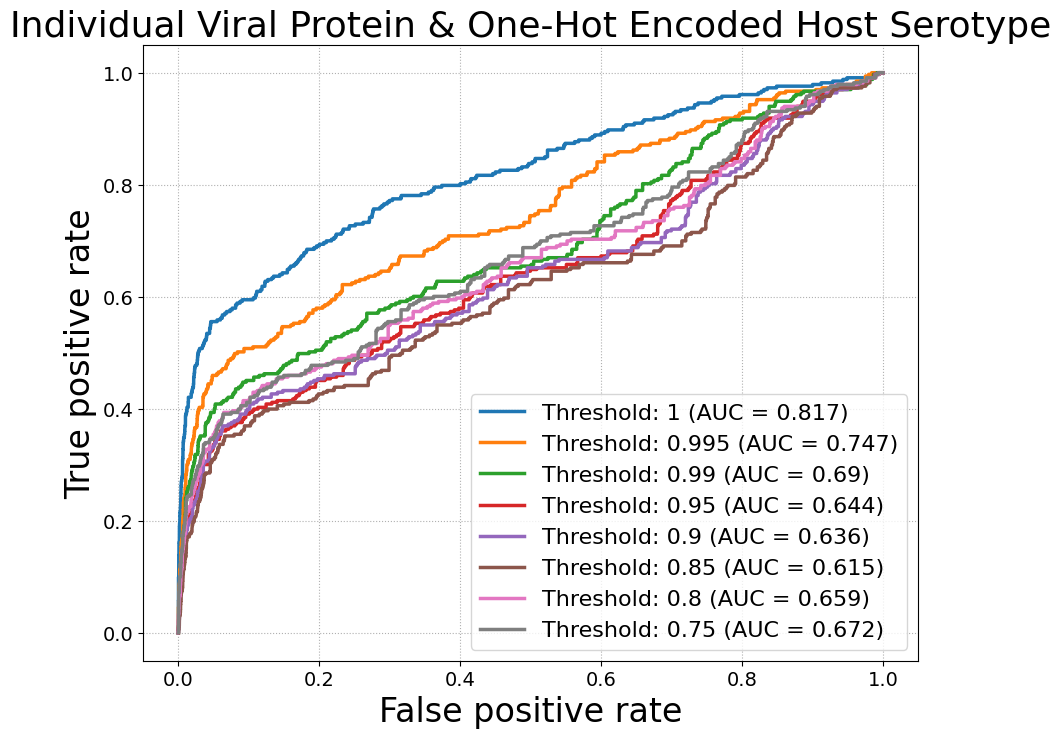

In [21]:
with open("../Results/0_AUCs_original_replica.pkl", 'rb') as f:
    loaded_data = pickle.load(f)

# .pkl paths:
# "0_AUCs_original_replica.pkl"                   - Replicating the original results after splitting the individual proteins, then re-averaging them
# "1_AUCs_max_max.pkl"                            - Maximum scores among protein-protein pairs
# "2_AUCs_max_max_original_sero.pkl"              - Replicating the original results, but using One-Hot Encoded serotypes instead of bacterial proteins
# "3_AUCs_max_max_sero.pkl"                       - Combining the previous two approaches: individual viral RBPs and One-Hot Encoded serotypes for bacterial proteins
# "4_AUCs_motif_focus_increased.pkl"              - Motif-containing RBPs and viruses that only express one RBP as positives
# "5_AUCs_motif_focus.pkl"                        - Motif-containing RBPs only as positives

threshold = [1, 0.995, 0.99, 0.95, 0.90, 0.85, 0.80, 0.75]

# Create a single figure for all ROC curves
fig, ax = plt.subplots(figsize=(10, 8))

# Loop through all data points and plot them on the same figure
for num, el in enumerate(loaded_data):
    thresh = threshold[num]
    labels = el[0]
    scoreslr = el[1]

    # predsss.append((label_max, scores_max, rauclr))

    fpr, tpr, thrs = roc_curve(labels, scoreslr)
    rauclr = round(auc(fpr, tpr), 3)
    #print("THRESHOLD: ", thresh)
    #print("AUC: ", rauclr)
    #print("##############################################")

    # Plot each ROC curve on the same axes
    ax.plot(fpr, tpr, linewidth=2.5, label=f'Threshold: {thresh} (AUC = {rauclr})')

# Final plot adjustments
ax.set_xlabel('False positive rate', size=24)
ax.set_ylabel('True positive rate', size=24)
ax.legend(loc=4, prop={'size': 16})
ax.grid(True, linestyle=':')
ax.yaxis.set_tick_params(labelsize=14)
ax.xaxis.set_tick_params(labelsize=14)
ax.set_title('Individual Viral Protein & One-Hot Encoded Host Serotype', fontsize=26)

plt.show()

## Adding Precision-Recall Curves

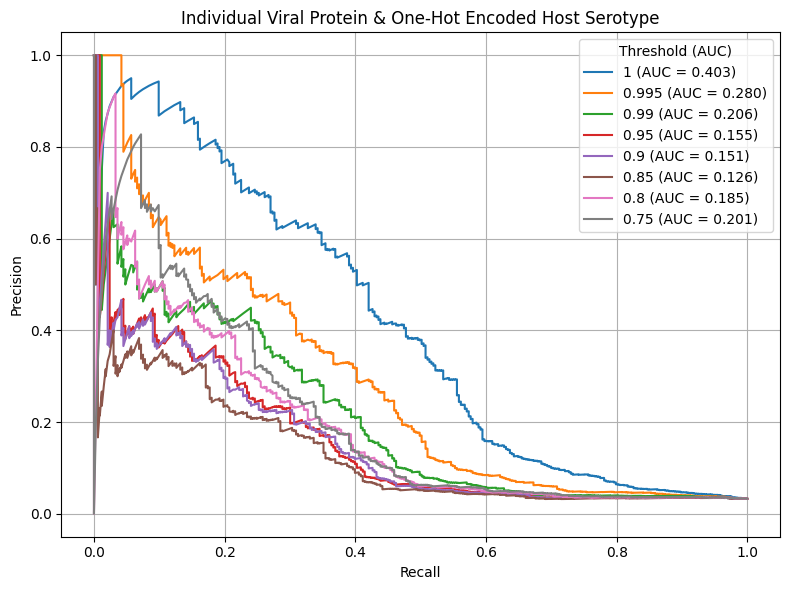

In [22]:
from sklearn.metrics import precision_recall_curve, auc
import matplotlib.pyplot as plt
import pickle

# Load the AUC data
with open("../Results/3_AUCs_max_max_sero.pkl", 'rb') as f:
    loaded_data = pickle.load(f)

# .pkl paths:
# "0_AUCs_original_replica.pkl"                   - Replicating the original results after splitting the individual proteins, then re-averaging them
# "1_AUCs_max_max.pkl"                            - Maximum scores among protein-protein pairs
# "2_AUCs_max_max_original_sero.pkl"              - Replicating the original results, but using One-Hot Encoded serotypes instead of bacterial proteins
# "3_AUCs_max_max_sero.pkl"                       - Combining the previous two approaches: individual viral RBPs and One-Hot Encoded serotypes for bacterial proteins
# "4_AUCs_motif_focus_increased.pkl"              - Motif-containing RBPs and viruses that only express one RBP as positives
# "5_AUCs_motif_focus.pkl"

# Corresponding LOGO similarity thresholds
thresholds = [1, 0.995, 0.99, 0.95, 0.90, 0.85, 0.80, 0.75]

# Create the PR plot
plt.figure(figsize=(8, 6))

for i, el in enumerate(loaded_data):
    labels = el[0]
    scores = el[1]

    precision, recall, _ = precision_recall_curve(labels, scores)
    pr_auc = auc(recall, precision)

    plt.plot(recall, precision, label=f"{thresholds[i]} (AUC = {pr_auc:.3f})")

plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Individual Viral Protein & One-Hot Encoded Host Serotype")
plt.legend(title="Threshold (AUC)", loc='upper right')
plt.grid(True)
plt.tight_layout()
plt.show()


Graph Names:

Different Group-Similarity Thresholds, \nAveraged Embeddings

Max Score Protein-Protein Interaction

Averaged Phage Embeddings, One-Hot Host Embedding

Protein-Serotype Match